In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import torch

import matplotlib.pyplot as plt


from model import *

# from model import Model, train, cal_phi

# Central path

# SGD

In [58]:
N = 10
omega = torch.rand(2**N)
omega = omega.sort()[0] / omega.norm()
# plt.plot(omega.sort()[0])

In [62]:
model_sgd = Model(N)
loss_list_sgd = SGD_train(model_sgd, omega, epoch=97)
print(loss_list_sgd[-1])

  0%|          | 0/97 [00:00<?, ?it/s]

100%|██████████| 97/97 [00:00<00:00, 759.07it/s]

tensor(-0.9927)


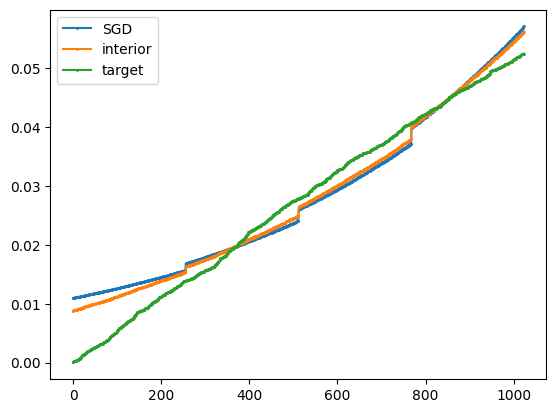

In [60]:
psi_sgd = psi_f(model_sgd.theta).detach()
psi_int = (4 * psi_sgd + omega) / 5 + torch.rand(2**N) * (psi_sgd[0]-omega[0])/100
plot_wavefunctions(psi_sgd, psi_int, omega)

In [69]:
omega[-1]

tensor(0.0525)

In [68]:
np.sqrt(3) * 2**(-1/2*N)

0.05412658773652741

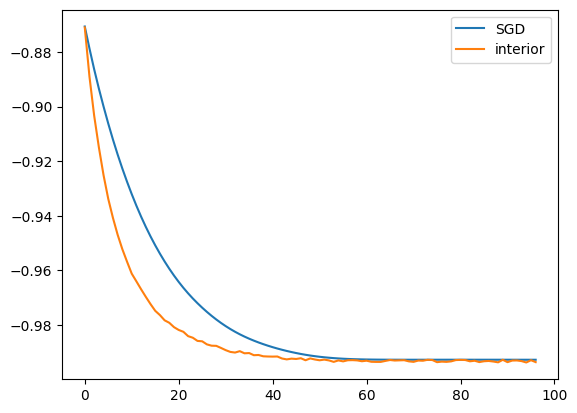

In [63]:
loss_list_int = loss_list_sgd
loss_list_int = ((loss_list_int - loss_list_int.min())/(loss_list_int.max() - loss_list_int.min()) * 2).exp()
loss_list_int = (loss_list_int - loss_list_int.min())/(loss_list_int.max() - 1) * (loss_list_sgd.max() - loss_list_sgd.min()) + loss_list_sgd.min()
loss_list_int += torch.rand(len(loss_list_int)) * -1e-3
plot_loss(loss_list_sgd, loss_list_int)